In [12]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style("darkgrid")

# Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import os
import argparse
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd
import numpy as np

from run import create_model
import config

def get_model_conf(uid):
    row = df.loc[uid]
    model_shortname = row['name']
    model_conf = config.get_model_config(uid, model_shortname, conf)
    return model_conf

def plot_ir(model_conf):
    return Image(filename=model_conf['regret_plot_path'])

def plot_step(model_conf):
    l = os.listdir(model_conf['plot_folder'])
    l.sort(key=lambda n: int(n.replace(".", "-").split('-')[1]))

    def show_image(i):
        fn = os.path.join(model_conf['plot_folder'], l[i])
        return Image(filename=fn)

    interact(show_image, i=widgets.IntSlider(min=0, max=len(l) - 1, step=1, value=0))

def recreate_model(uid, model_conf, train=True):
    args = argparse.Namespace(**df.loc[uid].to_dict())
    args.batch_size = int(args.batch_size) # quick fix
    bo = create_model(args)
    X = np.load(model_conf['obs_X_path'])
    Y = np.load(model_conf['obs_Y_path'])
    bo.model.init(X, Y, train=train)
    return bo

conf = config.get_config()
df = pd.read_csv(conf['database'])
df = df.set_index('uuid')


In [4]:
df

Unnamed: 0  acq  batch_size                        date  dim_basis  \
uuid                                                                           
f95d3bb6           0  UCB        1000  2018-08-14 15:15:39.753455         50   
30d29dd8           1  UCB        1000  2018-08-14 15:15:40.570681         50   
6f6b869e           2  UCB        1000  2018-08-14 15:16:09.355712         50   
7cef1196           3  UCB        1000  2018-08-14 15:15:39.914340         50   
e02c0e6e           4  UCB        1000  2018-08-14 15:15:40.534418         50   
821b75d6           5  UCB        1000  2018-08-14 15:15:39.970351         50   
e0ba6e57           6  UCB        1000  2018-08-14 15:16:09.324026         50   
166778e9           7  UCB        1000  2018-08-14 15:15:40.091410         50   
6f1bde65           8  UCB        1000  2018-08-14 15:15:39.753369         50   
988a8675           9  UCB        1000  2018-08-14 15:15:10.468769         50   
05132722          10  UCB        1000  2018-08-14 15:15:39.708913         50   
6140410b          11  UCB        1000  2018-08-14 15:15:10.378283         50   
141c1af4          12  UCB        1000  2018-08-14 15:15:39.970244         50   
83e50af5          13  UCB        1000  2018-08-14 15:15:39.624947         50   
08679614          14  UCB        1000  2018-08-14 15:15:40.090985         50   
476fe79b          15  UCB        1000  2018-08-14 15:16:09.669959         50   
ed0c7e68          16  UCB        1000  2018-08-14 15:15:39.726202         50   
811bcc87          17  UCB        1000  2018-08-14 15:15:10.449263         50   
065f6f53          18  UCB        1000  2018-08-14 15:16:09.669813         50   
8d376f81          19  UCB        1000  2018-08-14 15:15:39.557915         50   
13ecb436          20  UCB        1000  2018-08-14 15:15:39.955152         50   
7a04f11d          21  UCB        1000  2018-08-14 15:15:39.694023         50   
df1ce704          22  UCB        1000  2018-08-14 15:15:39.955086         50   
bc542316          23  UCB        1000  2018-08-14 15:32:10.300885         50   
6051a527          24  UCB        1000  2018-08-14 15:32:41.559604         50   
e44f68da          25  UCB        1000  2018-08-14 15:32:10.583424         50   
47febd20          26  UCB        1000  2018-08-14 15:32:41.383604         50   
ad2f84e9          27  UCB        1000  2018-08-14 15:35:10.040216         50   
83d6e5e4          28  UCB        1000  2018-08-14 15:32:09.300373         50   
1500c108          29  UCB        1000  2018-08-14 15:35:10.040364         50   
62d0a3c2          30  UCB        1000  2018-08-14 15:32:42.401300         50   
20feb2dc          31  UCB        1000  2018-08-14 15:35:09.395169         50   
a8825ba3          32  UCB        1000  2018-08-14 15:35:10.669446         50   
81b38486          33  UCB        1000  2018-08-14 15:35:09.413086         50   
ac92231c          34  UCB        1000  2018-08-14 15:32:10.310029         50   
3a4d79fe          35  UCB        1000  2018-08-14 15:35:10.040218         50   
72c93b8f          36  UCB        1000  2018-08-14 15:32:42.448138         50   
fe9c8a81          37  UCB        1000  2018-08-14 15:32:41.398163         50   
f165c6ab          38  UCB        1000  2018-08-14 15:35:09.693653         50   
85b878bd          39  UCB        1000  2018-08-14 15:35:09.430927         50   
9aafb39d          40  UCB        1000  2018-08-14 15:35:09.693631         50   
9378646f          41  UCB        1000  2018-08-14 15:32:09.310509         50   
cf9792e7          42  UCB        1000  2018-08-14 15:35:09.485348         50   
6397d57b          43  UCB        1000  2018-08-14 15:32:09.479317         50   
498e2f0b          44  UCB        1000  2018-08-14 15:35:09.554127         50   

          dim_h1  dim_h2  epochs  immediate_regret          incumbent    lr  \
uuid                                                                          
f95d3bb6      50      50    1000      [1.24851761]      [-1.24851761]  0.01   
30d29dd8    

# Specific model explorer

In [109]:
uid = 'bea975f2'
model_conf = get_model_conf(uid)

In [110]:
plot_step(model_conf)

interactive(children=(IntSlider(value=0, description='i', max=5), Output()), _dom_classes=('widget-interact',)…

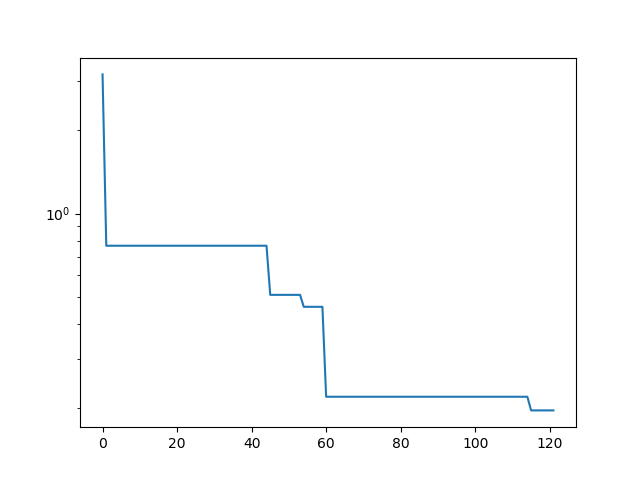

In [111]:
plot_ir(model_conf)

In [96]:
bo = recreate_model(uid, model_conf)

reconstraining parameters linear.variances
/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:

divide by zero encountered in log



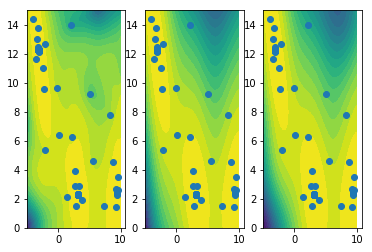

In [34]:
bo.plot_prediction()

In [38]:

fig = bo.plot_2D_surface(use_plotly=True)
iplot(fig)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



In [115]:
# Old models
models = [
    '2018-08-09.07-11-29.model-gp-num_mcmc-4-f-sinone',
    '2018-08-09.07-14-40.m-gp-mcmc-4-f-sinone',
    'b576fa03--m-gp',
    '2018-08-09.06-36-37.--model-gp---num_mcmc-4',
    '2018-08-09-07.21.13.f-hartmann6-k-200',
    'm=dngo-b=10-h1=10-h2=10-nn=1-bs=1000-e=1000-lr=0.01-l2=0-mcmc=0-f=branin-a=UCB-k=200',
    'm=dngo-b=50-h1=50-h2=50-nn=1-bs=1000-e=1000-lr=0.01-l2=0-mcmc=0-f=branin-a=UCB-k=200',
    'm=dngo-b=50-h1=50-h2=50-nn=1-bs=1000-e=1000-lr=0.01-l2=0.0001-mcmc=0-f=branin-a=UCB-k=200',
    'm=gp-b=10-h1=10-h2=10-nn=1-bs=1000-e=1000-lr=0.01-l2=0-mcmc=0-f=branin-a=UCB-k=200',
]
plot_folders = list(map(lambda x: conf['top_folder'] + '/' + x + '/plots', models))
ir_plots = list(map(lambda x: conf['top_folder'] + '/' + x + '/immediate_regret.png', models))
i = -5
_conf = {'plot_folder': plot_folders[i], 'regret_plot_path': ir_plots[i]}

In [116]:
plot_step(_conf)

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

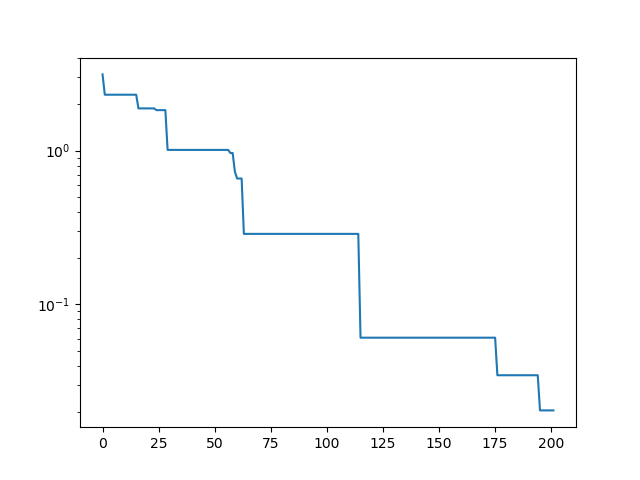

In [117]:
plot_ir(_conf)

# Objective Function Comparer

In [25]:
from src.tests import acc_ir, plot_ir

def show_ir(obj_func):
    model_rows = df[(df.obj_func == obj_func)]
    hist = []
    legends = []
    for uid, row in model_rows.iterrows():
        model_conf = get_model_conf(uid)
        bo = recreate_model(uid, model_conf, train=False)
        hist.append(acc_ir(bo.model.Y, bo.f_opt))
        legends.append(row['name'])
    plot_ir(hist)
    plt.legend(legends)
    
interact(show_ir, obj_func=df.obj_func.unique())

interactive(children=(Dropdown(description='obj_func', options=('bohachevsky', 'branin', 'levy', 'sintwo', 'si…

<function __main__.show_ir(obj_func)>

- Forrester: Note weird rounding error for dngo-nn-5-agg-max leading to increase in otherwise monotone decreasing regret..

In [51]:
from src.tests import acc_ir, plot_ir

def show_prediction(obj_func):
    model_rows = df[(df.obj_func == obj_func)]
    hist = []
    legends = []
    for uid, row in model_rows.iterrows():
        model_conf = get_model_conf(uid)
        bo = recreate_model(uid, model_conf, train=True)
        print("Model:", row['name'])
        bo.plot_prediction()
    
interact(show_prediction, obj_func=df.obj_func.unique())

interactive(children=(Dropdown(description='obj_func', options=('bohachevsky', 'branin', 'levy', 'sintwo', 'si…

<function __main__.show_prediction(obj_func)>